<a href="https://colab.research.google.com/github/kishanRaj10/18CSE044-DMDW-LAB/blob/main/DMDW_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt

url="https://raw.githubusercontent.com/Anasuya-Sahoo/DMDW-Lab/main/student-mat.csv"
df=pd.read_csv(url)
df
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


### **Dissimilarity matrix for binary attributes**

In [6]:
dfs=df[['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic',]]
dfs.head()


,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,yes,no,no,no,yes,yes,no,no
1,no,yes,no,no,no,yes,yes,no
2,yes,no,yes,no,yes,yes,yes,no
3,no,yes,yes,yes,yes,yes,yes,yes
4,no,yes,yes,no,yes,yes,no,no


In [8]:
dfs=dfs.replace('no',0)
dfs=dfs.replace('yes',1)
dfs.head()

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,1,0,0,0,1,1,0,0
1,0,1,0,0,0,1,1,0
2,1,0,1,0,1,1,1,0
3,0,1,1,1,1,1,1,1
4,0,1,1,0,1,1,0,0


In [13]:
n=np.array(dfs[['schoolsup','famsup']])
n=n.reshape(-1,2)
n.shape

(395, 2)

In [16]:
m=np.array(dfs[['romantic','internet']])
m=m.reshape(-1,2)
m.shape

(395, 2)

In [17]:
from scipy.spatial import distance 

In [19]:
dist_matrix=distance.cdist(n,m)
dist_matrix.shape

(395, 395)

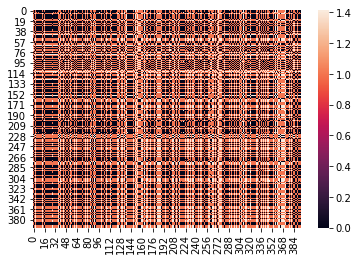

In [20]:
sbs.heatmap(dist_matrix)

## **Dissimilarity matrix for numerical attributes**

In [21]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [25]:
numerical=df[['age','Medu','Fedu','traveltime','studytime','failures']]
numerical.head()

,age,Medu,Fedu,traveltime,studytime,failures
0,18,4,4,2,2,0
1,17,1,1,1,2,0
2,15,1,1,1,2,3
3,15,4,2,1,3,0
4,16,3,3,1,2,0


In [33]:
num1=np.array(numerical[['age','failures']])
num1=num1.reshape(-1,2)
num1.shape

(395, 2)

In [32]:
num2=np.array(numerical[['Medu','Fedu']])
num2=num2.reshape(-1,2)
num2.shape

(395, 2)

## **## Dissimilarity matrix for nominal attributes**

In [34]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [37]:
nominal=df[['Mjob','Fjob','reason','guardian']]
nominal.head()

,Mjob,Fjob,reason,guardian
0,at_home,teacher,course,mother
1,at_home,other,course,father
2,at_home,other,other,mother
3,health,services,home,mother
4,other,other,home,father


In [40]:
nominal=nominal.replace('at_home','home')
nominal.head()

,Mjob,Fjob,reason,guardian
0,home,teacher,course,mother
1,home,other,course,father
2,home,other,other,mother
3,health,services,home,mother
4,other,other,home,father


In [41]:
nominal=nominal.astype('category')

In [49]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [50]:
nominal['guardian']=lb.fit_transform(nominal['guardian'])
nominal['Mjob']=lb.fit_transform(nominal['Mjob'])
nominal['Fjob']=lb.fit_transform(nominal['Fjob'])
nominal['reason']=lb.fit_transform(nominal['reason'])

In [51]:
nominal.head()

,Mjob,Fjob,reason,guardian
0,1,4,0,1
1,1,2,0,0
2,1,2,2,1
3,0,3,1,1
4,2,2,1,0


In [52]:
nom1=np.array(nominal)
nom1.reshape(-1,2)
nom1.shape

(395, 4)

In [53]:
nom2=np.array(nominal)
nom2.reshape(-1,2)
nom2.shape

(395, 4)

In [54]:
dist_matrix2=distance.cdist(nom1,nom2)
print(dist_matrix)


[[1.         1.41421356 1.41421356 ... 1.         1.41421356 1.41421356]
 [1.         0.         0.         ... 1.         0.         0.        ]
 [1.         1.41421356 1.41421356 ... 1.         1.41421356 1.41421356]
 ...
 [0.         1.         1.         ... 0.         1.         1.        ]
 [0.         1.         1.         ... 0.         1.         1.        ]
 [0.         1.         1.         ... 0.         1.         1.        ]]
